<a href="https://colab.research.google.com/github/LindsClar/Capstone_2/blob/main/27_3_Capstone_Two_Pre_processing_and_Training_Data_Development.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
#import packages normal backages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [14]:
#read CSV files
df = pd.read_csv('/content/USRealEstateTrends.csv')

In [15]:
#Analyze information
df.head()

,RegionID,SizeRank,RegionName,StateName,2018-02-HomeValue,2018-02-DaysPending,2018-02-CutRaw,2018-03-HomeValue,2018-03-DaysPending,2018-03-CutRaw,...,2024-02-CutRaw,2024-03-HomeValue,2024-03-DaysPending,2024-03-CutRaw,2024-04-HomeValue,2024-04-DaysPending,2024-04-CutRaw,2024-05-HomeValue,2024-05-DaysPending,2024-05-CutRaw
0,102001,0,United States,NaN,225746.614318,52.0,7600.0,227155.648994,48.0,8900.0,...,10000.0,357374.362080,42.0,10000.0,359240.114070,38.0,10000.0,360681.294250,37.0,10000.0
1,394913,1,"New York, NY",NY,468313.430126,68.0,16000.0,470102.249154,63.0,19751.5,...,25000.0,646508.747102,55.0,25000.0,652619.099940,51.0,26000.0,657279.223513,47.0,30000.0
2,753899,2,"Los Angeles, CA",CA,629019.165765,33.0,20000.0,636850.139417,31.0,20000.0,...,30000.5,952665.578913,32.0,34000.0,956266.687926,29.0,40012.0,962388.491425,28.0,40000.0
3,394463,3,"Chicago, IL",IL,229741.266973,52.0,8000.0,231317.183706,42.0,9100.0,...,10000.0,316875.294320,29.0,10000.0,319764.144323,25.0,10000.0,321897.252361,23.0,10000.0
4,394514,4,"Dallas, TX",TX,241533.231800,46.0,8562.0,243401.180622,42.0,9900.0,...,10000.0,379972.349667,42.0,10000.0,380957.392395,38.0,10000.0,381103.625851,38.0,10000.0


In [16]:
#clean/fill missing data
#rename column name
df.rename(index=str, columns={'RegionName' : 'Location', 'StateName':'State'}, inplace=True)

#dropping the not needed
df.dropna(inplace=True)

#identifying missing values
df.isna().sum()

,0
RegionID,0
SizeRank,0
Location,0
State,0
2018-02-HomeValue,0
...,...
2024-04-DaysPending,0
2024-04-CutRaw,0
2024-05-HomeValue,0
2024-05-DaysPending,0


In [17]:
#Melting Data - melted data allows you to split the dataset by time
df_melt=pd.melt(df, id_vars=['RegionID','SizeRank','Location','State',], var_name='Year_Month_Parameters', value_name='Values')

df_melt[['Year', 'Month_Parameters']] = df_melt['Year_Month_Parameters'].str.split('-', expand=True, n=1)
df_melt.drop('Year_Month_Parameters', axis=1, inplace=True)

#Organize so melted DF shows a column of month
df_melt[['Month', 'Parameters']] = df_melt['Month_Parameters'].str.split('-', expand=True, n=1)
df_melt.drop(columns = ['Month_Parameters'], inplace=True)

df_melt.head()


,RegionID,SizeRank,Location,State,Values,Year,Month,Parameters
0,394913,1,"New York, NY",NY,468313.430126,2018,02,HomeValue
1,753899,2,"Los Angeles, CA",CA,629019.165765,2018,02,HomeValue
2,394463,3,"Chicago, IL",IL,229741.266973,2018,02,HomeValue
3,394514,4,"Dallas, TX",TX,241533.231800,2018,02,HomeValue
4,394692,5,"Houston, TX",TX,208651.872272,2018,02,HomeValue


In [18]:
# Pivot the DataFrame to have measures as columns
df_reorganized = df_melt.pivot_table(index=['RegionID','SizeRank','Location','State','Year','Month'], columns='Parameters', values='Values').reset_index()
df_reorganized.head(5)

Parameters,RegionID,SizeRank,Location,State,Year,Month,CutRaw,DaysPending,HomeValue
0,394308,64,"Albany, NY",NY,2018,02,5100.0,64.0,218876.519605
1,394308,64,"Albany, NY",NY,2018,03,7000.0,62.0,219792.863791
2,394308,64,"Albany, NY",NY,2018,04,8000.0,54.0,220505.058669
3,394308,64,"Albany, NY",NY,2018,05,9000.0,45.0,221526.705984
4,394308,64,"Albany, NY",NY,2018,06,9100.0,47.0,222479.931387


In [19]:
#focus to CA  - filter the DF
CA = df_reorganized.loc[df_reorganized['State']=='CA']

In [20]:
#Correcting time
CA['Date'] = pd.to_datetime(CA['Year'].astype(str) + '-' + CA['Month'].astype(str))
print(CA['Date'].head())

304   2018-02-01
305   2018-03-01
306   2018-04-01
307   2018-05-01
308   2018-06-01
Name: Date, dtype: datetime64[ns]


<ipython-input-20-870d248f46d4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CA['Date'] = pd.to_datetime(CA['Year'].astype(str) + '-' + CA['Month'].astype(str))


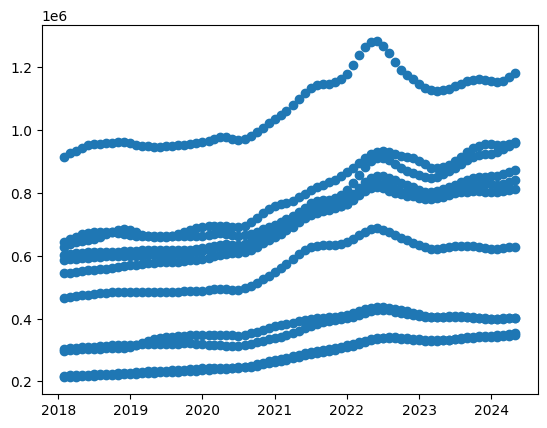

In [27]:
import matplotlib.pyplot as plt

plt.scatter(CA['Date'], CA['HomeValue'])

In [21]:
#create Dummy feature
dummy = pd.get_dummies(CA['HomeValue'])

CA = pd.concat([CA, dummy], axis=1)

#Testing and merging the df with dummy
#CA = df.merge(dummy, left_index=True, right_index=True)
#decided to stick with a concantenation

In [22]:
#Scale Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

CA_scaled = scaler.fit_transform(CA['HomeValue'].values.reshape(-1, 1))

In [38]:
#Split Data into Training and testing Subset and Go
#defines X and y variable

X = CA_scaled
y = CA.drop(['Location', 'State'], axis=1)

y = y.astype('int64')

In [39]:
#import library
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)


In [40]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()

In [41]:
clf.fit(X_train, y_train)

LinearRegression()

In [42]:
clf.predict(X_test)

array([[ 4.70793182e+05,  2.67642004e+02,  2.01995036e+03, ...,
         0.00000000e+00, -5.41987196e-03, -5.42966009e-03],
       [ 4.65548470e+05,  2.11938144e+02,  2.02033675e+03, ...,
         0.00000000e+00, -1.96209089e-03, -1.96713166e-03],
       [ 4.54698837e+05,  9.67046639e+01,  2.02113605e+03, ...,
         0.00000000e+00,  5.19095286e-03,  5.19573285e-03],
       ...,
       [ 4.63226626e+05,  1.87277936e+02,  2.02050780e+03, ...,
         0.00000000e+00, -4.31324402e-04, -4.34263509e-04],
       [ 4.65652587e+05,  2.13043964e+02,  2.02032908e+03, ...,
         0.00000000e+00, -2.03073392e-03, -2.03586894e-03],
       [ 4.60269029e+05,  1.55865427e+02,  2.02072569e+03, ...,
         0.00000000e+00,  1.51858673e-03,  1.51832475e-03]])

In [44]:
y_test.head()

,RegionID,SizeRank,Year,Month,CutRaw,DaysPending,HomeValue,Date,212531.66695,213905.260766,...,1183271.6539,1193047.923592,1206720.776395,1216411.050343,1239721.827511,1245208.5167,1266709.515319,1269702.351591,1281861.306884,1282796.65602
8439,395195,119,2018,5,6400,33,221145,1525132800000000000,0,0,...,0,0,0,0,0,0,0,0,0,0
9259,753920,569,2023,5,17500,47,405181,1682899200000000000,0,0,...,0,0,0,0,0,0,0,0,0,0
6902,395050,125,2023,4,50000,40,785891,1680307200000000000,0,0,...,0,0,0,0,0,0,0,0,0,0
9237,753920,569,2021,7,24000,23,377602,1625097600000000000,0,0,...,0,0,0,0,0,0,0,0,0,0
5488,394952,71,2019,6,14025,44,618358,1559347200000000000,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
clf.score(X_test, y_test)

0.0014586183879162615

This demonstates a really low predictive accuracy using linear Regression.